# U.S. Medical Insurance Costs

## Scope of the Project

This project aims at analyzing a [Kaggle dataset](https://www.kaggle.com/mirichoi0218/insurance) containing information regarding the costs of insurance for various people in various parts of the United States. In what follows, I aim at:

1. analyzing the available data, providing basic information concerning percentages and distribution;
2. answering questions about how sex and geographical context may affect one's lifestyle and insurance costs.

An immediately evident challenge for this project is the complexity of the data and the mulltiple factors that affect the costs of insurance; **how can I examine the impact of a single variable (say, sex or geographical location) without taking into account everything else?**

### Importing the dataset into Python

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preliminary analysis of the dataset

I will start by creating different arrays for the numerical values in the dataset:

1. age
2. BMI
3. number of children
4. insurance charges.

In [2]:
age = df["age"]

bmi = df["bmi"]
children = df["children"]

charges = df["charges"]

Now I will analyze some of this data, starting with the numerical values (charges, age, bmi, number of children).


 **Individual medical costs billed by health insurance**
 
        The mean of this array is 13270.422265141257.
        This is the five-number summary for this array:
            - sample minimum: 1121.8739,
            - first quartile: 4740.28715,
            - median: 9382.033,
            - third quartile: 16639.912515,
            - sample maximum: 63770.42801.
        The interquartile range for this array is 11899.625365.
        The standard deviation is 12105.484975561612.
        The variance is 146542766.49354792.
        


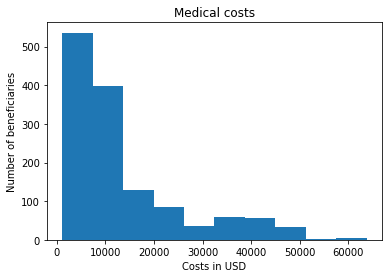


 **Age of primary beneficiary** 
 
        The mean of this array is 39.20702541106129.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 24.0.
        The standard deviation is 14.044709038954522.
        The variance is 197.2538519888909.
        


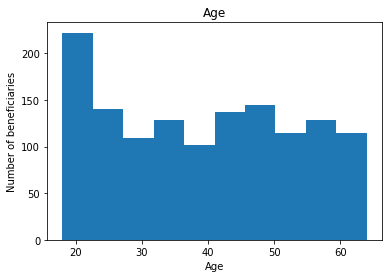

In [3]:
def essential_array_analysis(array):
    return (
        """
        The mean of this array is {mean}.
        This is the five-number summary for this array:
            - sample minimum: {sample_minimum},
            - first quartile: {first_quartile},
            - median: {median},
            - third quartile: {third_quartile},
            - sample maximum: {sample_maximum}.
        The interquartile range for this array is {interquartile_range}.
        The standard deviation is {standard_deviation}.
        The variance is {variance}.
        """.format(
        mean = np.mean(array),
        sample_minimum = min(array),
        first_quartile = np.percentile(array, 25),
        median = np.median(array),
        third_quartile = np.percentile(array, 75),
        sample_maximum = max(array),
        interquartile_range = (np.percentile(array, 75) - np.percentile(array, 25)),
        standard_deviation = np.std(array),
        variance = np.var(array)
        ))

print("\n **Individual medical costs billed by health insurance**\n", essential_array_analysis(charges))
plt.hist(charges)
plt.title("Medical costs")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()
print("\n **Age of primary beneficiary** \n", essential_array_analysis(age))
plt.hist(age)
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Number of beneficiaries")
plt.show()


 **Body mass index** 
 
        The mean of this array is 30.66339686098655.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 26.29625,
            - median: 30.4,
            - third quartile: 34.69375,
            - sample maximum: 53.13.
        The interquartile range for this array is 8.3975.
        The standard deviation is 6.0959076415894256.
        The variance is 37.16008997478835.
        


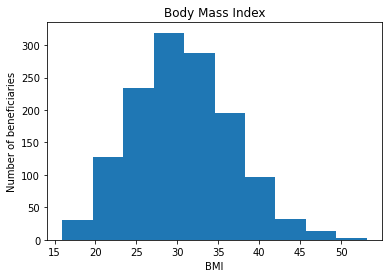


 **Number of children** 
 
        The mean of this array is 1.0949177877429.
        This is the five-number summary for this array:
            - sample minimum: 0,
            - first quartile: 0.0,
            - median: 1.0,
            - third quartile: 2.0,
            - sample maximum: 5.
        The interquartile range for this array is 2.0.
        The standard deviation is 1.2050421724928497.
        The variance is 1.452126637486287.
        


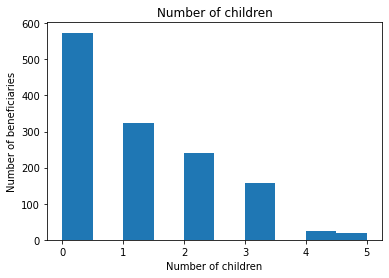

In [4]:
print("\n **Body mass index** \n", essential_array_analysis(bmi))
plt.hist(bmi)
plt.title("Body Mass Index")
plt.xlabel("BMI")
plt.ylabel("Number of beneficiaries")
plt.show()
print("\n **Number of children** \n", essential_array_analysis(children))
plt.hist(children)
plt.title("Number of children")
plt.xlabel("Number of children")
plt.ylabel("Number of beneficiaries")
plt.show()

Now I will analyze the categorical values in the dataset (smokers and non-smokers, region of provenance, sex).

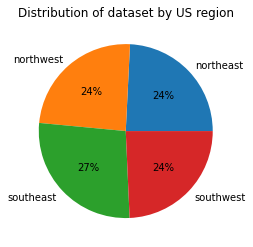

      region  beneficiaries  percentage
0  northeast            324   24.215247
1  northwest            325   24.289985
2  southeast            364   27.204783
3  southwest            325   24.289985


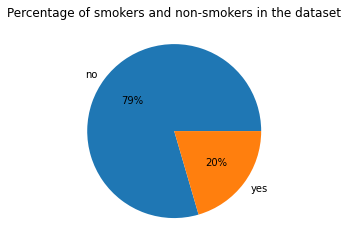

  smoker  beneficiaries  percentage
0     no           1064   79.521674
1    yes            274   20.478326


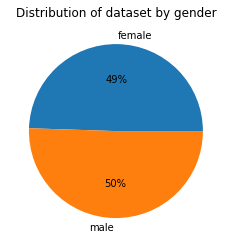

      sex  beneficiaries  percentage
0  female            662   49.476831
1    male            676   50.523169


In [5]:
category = lambda category: \
    df.rename(columns = {"charges": "beneficiaries"}).groupby(category).beneficiaries.count().reset_index()
region = category("region")
plt.pie(region["beneficiaries"], labels = region["region"], autopct = "%d%%")
plt.title("Distribution of dataset by US region")
plt.show()
perc_column = lambda perc_column: (perc_column["beneficiaries"] / df["charges"].count()) * 100
region["percentage"] = perc_column(region)
print(region)
smoker = category("smoker")
plt.pie(smoker["beneficiaries"], labels = smoker["smoker"], autopct = "%d%%")
plt.title("Percentage of smokers and non-smokers in the dataset")
plt.show()
smoker["percentage"] = perc_column(smoker)
print(smoker)
sex = category("sex")
plt.pie(sex["beneficiaries"], labels = sex["sex"], autopct = "%d%%")
plt.title("Distribution of dataset by gender")
plt.show()
sex["percentage"] = perc_column(sex)
print(sex)

### Adding a column for insurance costs tiers
The insurance costs in this dataset tend to be under $10,000; few go above $15,000; a minimal percentage goes above $50,000. To facilitate the next steps of the analysis, I will add another column where the insurance costs are categorized into four tiers:
- below $5,000: **low**;
- between $5,000 and $10,000: **medium**;
- between $10,000 and 15,000: **high**;
- above $15,000: **highest**.

In [16]:
for i, row in df.iterrows():
    if row["charges"] < 5000:
        row["cost_tier"] = "low"
    elif row["charges"] >= 5000 and row["charges"] < 10000:
        row["cost_tier"] = "medium"
    elif row["charges"] >= 10000 and row["charges"] < 15000:
        row["cost_tier"] = "high"
    else:
        row["cost_tier"] = "highest"

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Additional tables
I will now create additional tables where the data is rearranged according to two particular categories: gender and geographical provenance.

#### Analysis on the basis of gender
I will start with insurance costs.

In [9]:
sex_costs = df.groupby(["sex", "charges"]).bmi.count().reset_index()
print(sex_costs)

         sex      charges  bmi
0     female   1607.51010    1
1     female   1615.76670    1
2     female   1621.88270    1
3     female   1622.18850    1
4     female   1629.83350    1
...      ...          ...  ...
1332    male  49577.66240    1
1333    male  51194.55914    1
1334    male  52590.82939    1
1335    male  60021.39897    1
1336    male  62592.87309    1

[1337 rows x 3 columns]
